In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

#READING CSV FILES

df = pd.read_csv('athlete_events.csv')
dr = pd.read_csv('rd1.csv')	
# print(df)

a2 = df[df['Season']=='Summer']
a2.to_csv("summer.csv",index = False)
ds = pd.read_csv('summer.csv')
#print(ds)

a3 = df[df['Season']=='Winter']
a3.to_csv('winter.csv', index = False)
dw = pd.read_csv('winter.csv')
#print(dw)
df = pd.concat([df,pd.get_dummies(df.Medal)],axis=1)
df['allmedals']= df['Bronze'] + df['Gold'] + df['Silver'] 

ds = pd.concat([ds,pd.get_dummies(ds.Medal)],axis=1)
ds['allmedals']= ds['Bronze'] + ds['Gold'] + ds['Silver'] 

In [4]:
#SPORT
s = ds[ds.Sport == 'Athletics']


In [20]:
#EVENTS FOR SPORT
n_events = s[['Event']]
n_events = n_events.nunique()
n_events

Event    83
dtype: int64

In [34]:
#MEDAL COUNT
d = s.groupby('Team').agg({'Medal':'count'}).sort_values('Medal',ascending =False)
d = d.reset_index()
dom = d.head(5)

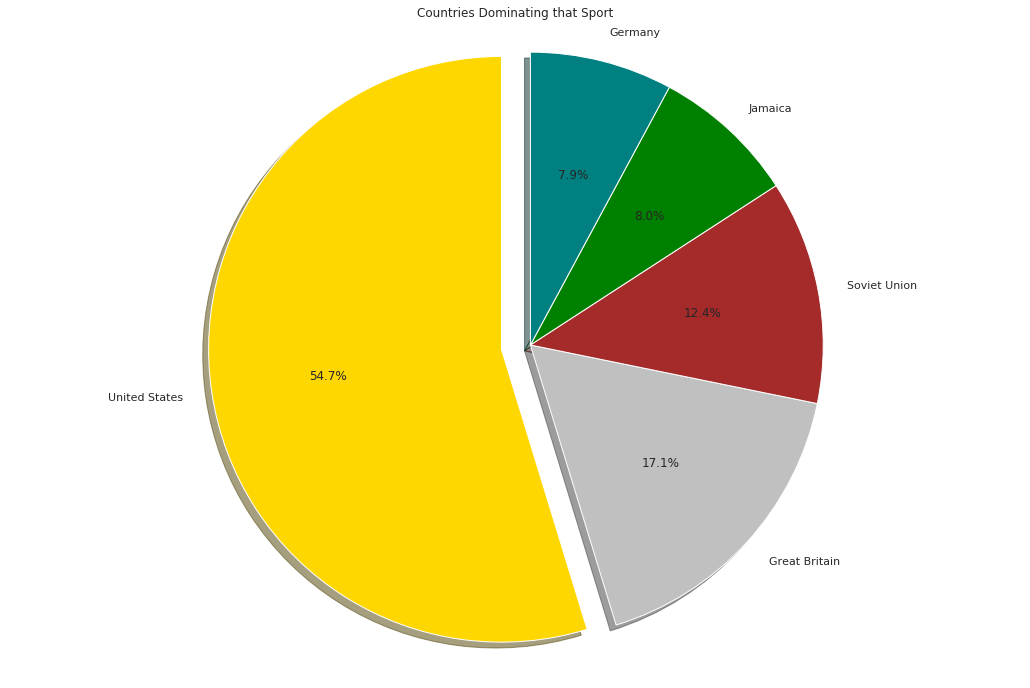

In [79]:
#Top 5 countries of that sport
##Donut

# size_of_groups= dom.Medal
# names = dom.Team 
# # Create a pieplot
# plt.pie(size_of_groups)
# plt.pie(size_of_groups, labels=names, autopct = '%1.1f%%', colors=['red','yellow','green','black','blue'])
# p=plt.gcf()
# p.set_size_inches(7, 9)
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p.gca().add_artist(my_circle)
# plt.show()

##PIE CHART

labels = dom.Team
sizes = dom.Medal
explode = (0.1, 0, 0, 0, 0)  
colors =  ['gold','silver','brown','green','teal']

plt.pie(sizes, explode=explode, labels=labels,colors= colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal') 
plt.title("Countries Dominating the Given Sport")
plt.show()

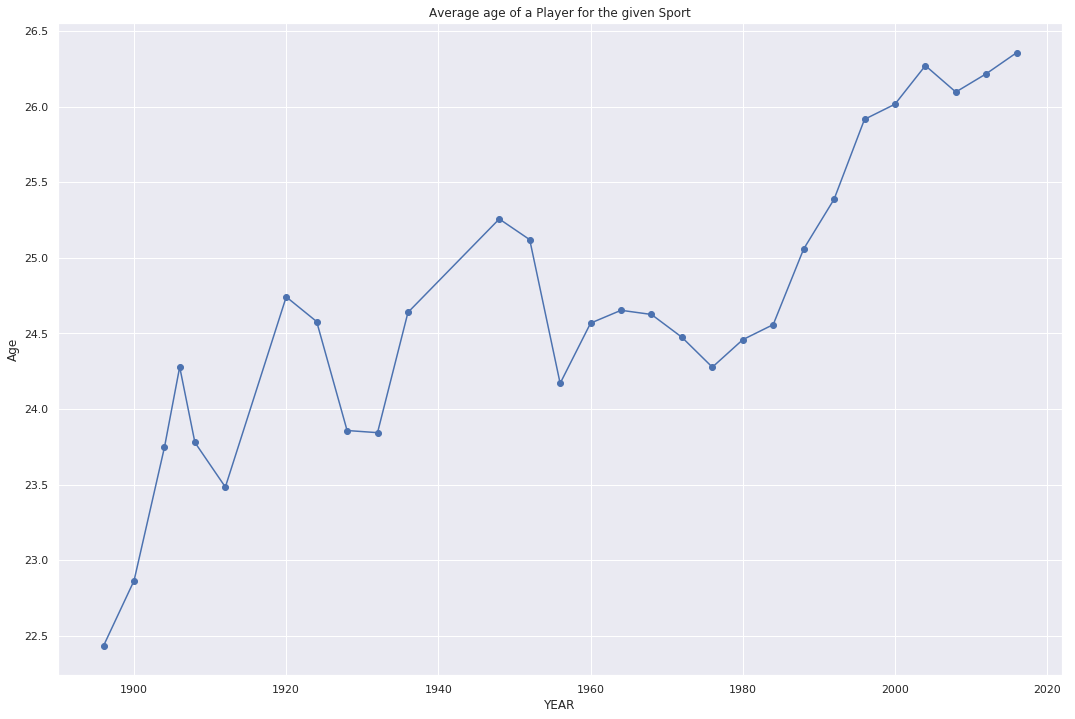

In [86]:
#Average Age

a = s[['Year', 'Age']]
meanage = s.groupby('Year')['Age'].mean()
meanage = pd.DataFrame({'Year':meanage.index,'Age':meanage.values})
#meanage.set_index('Year', inplace = True)

# sns.set(rc={'figure.figsize':(18,12)})
# plot1 = sns.barplot('Year','Age',data=meanage).set_xticklabels(meanage.Year,rotation=82)
# #plot1.set(xlabel='YEAR',ylabel='Number of people')
# plt.xlabel("YEAR")
# plt.ylabel("Age")
# plt.title("Average age of a Player for the given Sport")



plt.plot( 'Year', 'Age', data=meanage, linestyle='-', marker='o')

plt.xlabel("YEAR")
plt.ylabel("Age")
plt.title("Average age of a Player for the given Sport")
plt.show()


Text(0.5, 1.0, 'Height vs Weight  for given Sport')

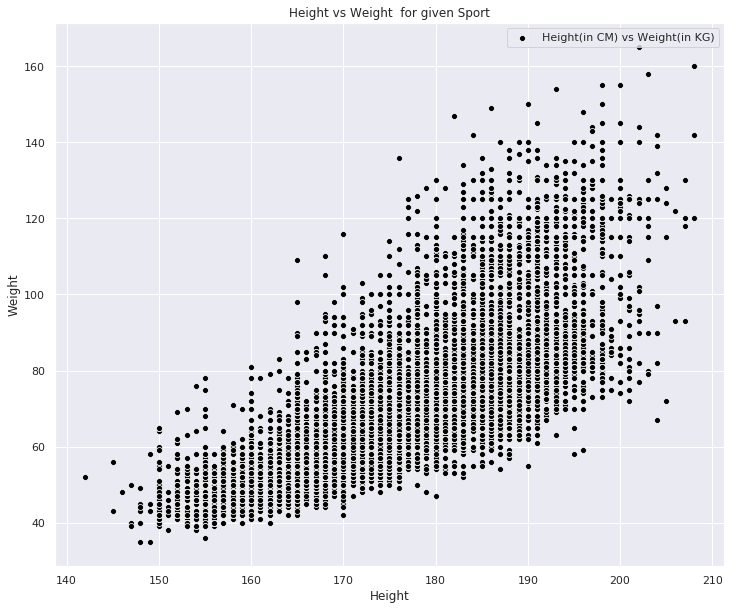

In [46]:
#HEIGHT VS WEIGHT OF SPORT
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=s,label = 'Height(in CM) vs Weight(in KG)', color = 'black')
plt.legend()
plt.title('Height vs Weight  for given Sport')

Text(0.5, 1.0, 'Age at which a player has won most number of Medals for the given Sport')

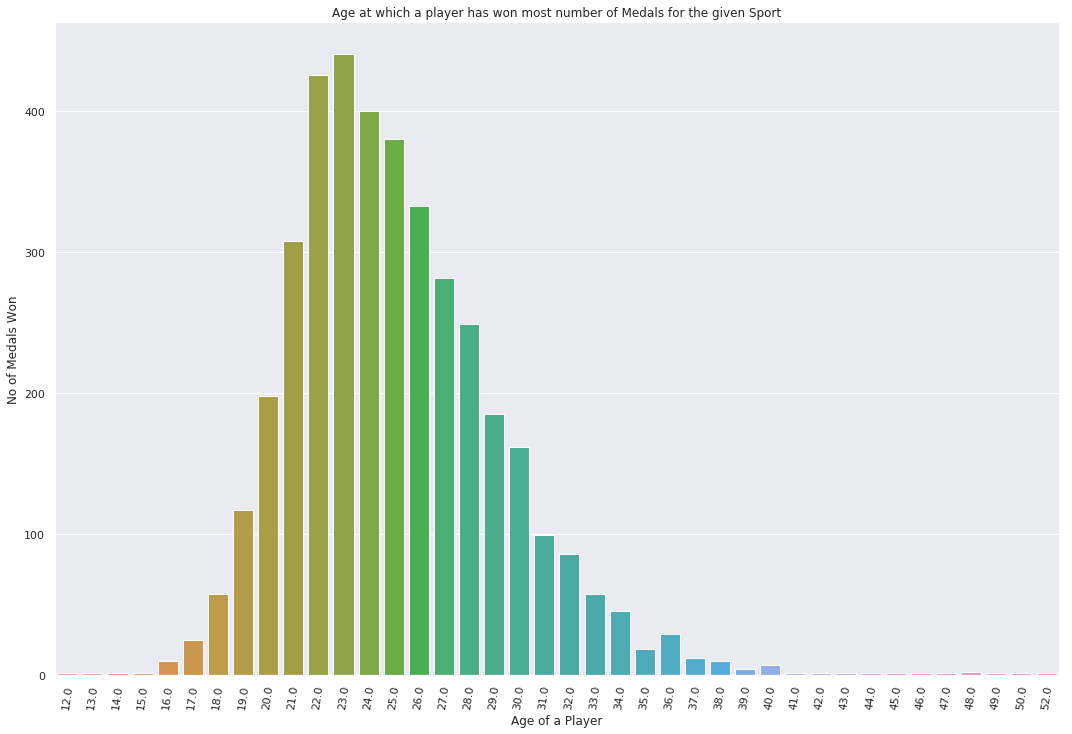

In [71]:
#Age at which a player has won most number of Medals for the given Sport
medals = s.groupby('Age').agg({'Medal':'count'})
medals = medals.reset_index()

sns.countplot(medals['Age'])
plot1 = sns.barplot('Age','Medal',data=medals).set_xticklabels(medals.Age,rotation=82)
plt.xlabel('Age of a Player')
plt.ylabel('No of Medals Won')
plt.title('Age at which a player has won most number of Medals for the given Sport')



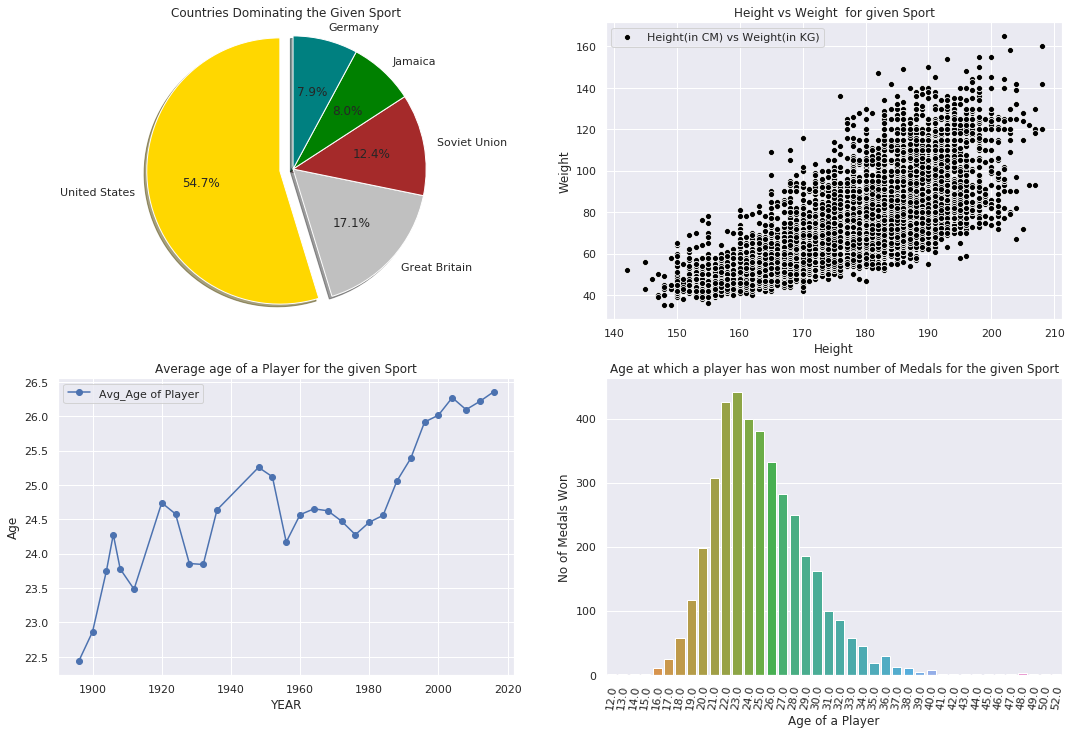

In [84]:
#SUBPLOT
fig = plt.figure()

plt.subplot(2, 2, 1)

labels = dom.Team
sizes = dom.Medal
explode = (0.1, 0, 0, 0, 0)  
colors =  ['gold','silver','brown','green','teal']
plt.pie(sizes, explode=explode, labels=labels,colors= colors, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal') 
plt.title("Countries Dominating the Given Sport")



plt.subplot(2, 2, 2)


ax = sns.scatterplot(x="Height", y="Weight", data=s,label = 'Height(in CM) vs Weight(in KG)', color = 'black')
plt.legend()
plt.title('Height vs Weight  for given Sport')

plt.subplot(2, 2, 3)

plt.plot( 'Year', 'Age', data=meanage, linestyle='-', marker='o',label = 'Avg_Age of Player')

plt.xlabel("YEAR")
plt.ylabel("Age")
plt.legend()
plt.title("Average age of a Player for the given Sport")


plt.subplot(2, 2, 4)

sns.countplot(medals['Age'])
plot1 = sns.barplot('Age','Medal',data=medals).set_xticklabels(medals.Age,rotation=82)
plt.xlabel('Age of a Player')
plt.ylabel('No of Medals Won')

plt.title('Age at which a player has won most number of Medals for the given Sport')

plt.show()